In [2]:
#int.from_bytes(b'\x217\x184\130\065', byteorder='little')

In [3]:
import struct

In [4]:
# def hex_to_float_manual(hex_str):
#     int_value = int(hex_str, 16)
#     print(int_value)
#     byte_array = int_value.to_bytes(4, byteorder='big')
#     float_num = struct.unpack('!f', byte_array)[0]
#     return float_num

# # Example 
# hex_str = "4182b8d9"
# print(hex_to_float_manual(hex_str))  

In [5]:
#(217).to_bytes(4, byteorder='little')

In [6]:
#struct.unpack('!f', bytes.fromhex('0zaf890A'))[0]

Function for translating to float

In [7]:
def translate(list):
    hexString = ''.join([("0x%0.2X" % int(num.strip()))[2:] for num in list][::-1])
    return struct.unpack('!f', bytes.fromhex(hexString))[0]

In [8]:
#translate([' 136', ' 226', ' 10', ' 68'])
#strHex = "0x%0.2X" % 10
#print(strHex[2:])
#print(struct.unpack('!f', bytes.fromhex('440ae288'))[0])
#print(translate(['134', '241', '5', '69']))


In [9]:
#print(translate([122, 175, 137, 65]))
#print(translate([217, 184, 130, 65]))

Create df

In [10]:
import pandas as pd
df = pd.read_csv('taskB.txt', header=None, sep = '&', skiprows = lambda x: x < 1)

# df = pd.read_fwf('TaskB.txt', header=None)
df = df[0].str.split('[', expand=True)

In [11]:
df.head()

,0,1
0,13:59:14.260 2 0x1 1,"8, 0, 0, 0]"
1,13:59:14.260 2 0x2 2,"171, 1, 0, 0]"
2,13:59:14.260 2 0x3 1,"2, 0, 0, 0]"
3,13:59:14.260 2 0x4 8,"92, 113, 133, 85, 132, 112, 133, 85]"
4,13:59:14.260 2 0x15 2,"0, 0, 0, 0]"


Formatting

In [12]:
byte = pd.DataFrame(df[1])
byte.head()
byte[1] = byte[1].str.replace("]","")
byte.head()

,1
0,"8, 0, 0, 0"
1,"171, 1, 0, 0"
2,"2, 0, 0, 0"
3,"92, 113, 133, 85, 132, 112, 133, 85"
4,"0, 0, 0, 0"


In [13]:
data = df[0].str.split(' ', expand=True)
data = data.drop(4, axis = 1)

In [14]:
data['bytes'] = byte
data = data.rename(columns = {0:'timestamp', 1:'can1', 2:'can2', 3:'numBytes'})
data.head()


,timestamp,can1,can2,numBytes,bytes
0,13:59:14.260,2,0x1,1,"8, 0, 0, 0"
1,13:59:14.260,2,0x2,2,"171, 1, 0, 0"
2,13:59:14.260,2,0x3,1,"2, 0, 0, 0"
3,13:59:14.260,2,0x4,8,"92, 113, 133, 85, 132, 112, 133, 85"
4,13:59:14.260,2,0x15,2,"0, 0, 0, 0"


In [15]:
data['combined'] = data['can2']+data['can1']
data.head()


,timestamp,can1,can2,numBytes,bytes,combined
0,13:59:14.260,2,0x1,1,"8, 0, 0, 0",0x12
1,13:59:14.260,2,0x2,2,"171, 1, 0, 0",0x22
2,13:59:14.260,2,0x3,1,"2, 0, 0, 0",0x32
3,13:59:14.260,2,0x4,8,"92, 113, 133, 85, 132, 112, 133, 85",0x42
4,13:59:14.260,2,0x15,2,"0, 0, 0, 0",0x152


In [16]:
data['seconds']=[0]*len(data['timestamp'])

In [17]:
times = []
for row in range(len(data['timestamp'])):
    time = data['timestamp'][row].split(':')
    times.append(3600*int(time[0]) + 60*int(time[1]) + float(time[2]))
data['seconds']=times
    

In [18]:
data.head()

,timestamp,can1,can2,numBytes,bytes,combined,seconds
0,13:59:14.260,2,0x1,1,"8, 0, 0, 0",0x12,50354.26
1,13:59:14.260,2,0x2,2,"171, 1, 0, 0",0x22,50354.26
2,13:59:14.260,2,0x3,1,"2, 0, 0, 0",0x32,50354.26
3,13:59:14.260,2,0x4,8,"92, 113, 133, 85, 132, 112, 133, 85",0x42,50354.26
4,13:59:14.260,2,0x15,2,"0, 0, 0, 0",0x152,50354.26


df for speed

In [19]:
wheel = data[data['combined']=='0x222']
wheel.reset_index(drop=True, inplace=True)
wheel.head()



,timestamp,can1,can2,numBytes,bytes,combined,seconds
0,13:59:14.284,2,0x22,8,"136, 226, 10, 68, 82, 161, 2, 68",0x222,50354.284
1,13:59:14.308,2,0x22,8,"34, 198, 252, 67, 98, 255, 4, 68",0x222,50354.308
2,13:59:14.316,2,0x22,8,"71, 250, 252, 67, 48, 158, 238, 67",0x222,50354.316
3,13:59:14.324,2,0x22,8,"226, 211, 5, 68, 245, 214, 248, 67",0x222,50354.324
4,13:59:14.332,2,0x22,8,"229, 91, 15, 68, 135, 62, 19, 68",0x222,50354.332


In [20]:
wheel['val1']=[0]*len(wheel['timestamp'])
wheel['val2']=[0]*len(wheel['timestamp'])
wheel.head()

C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\2197067840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheel['val1']=[0]*len(wheel['timestamp'])
C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\2197067840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheel['val2']=[0]*len(wheel['timestamp'])


,timestamp,can1,can2,numBytes,bytes,combined,seconds,val1,val2
0,13:59:14.284,2,0x22,8,"136, 226, 10, 68, 82, 161, 2, 68",0x222,50354.284,0,0
1,13:59:14.308,2,0x22,8,"34, 198, 252, 67, 98, 255, 4, 68",0x222,50354.308,0,0
2,13:59:14.316,2,0x22,8,"71, 250, 252, 67, 48, 158, 238, 67",0x222,50354.316,0,0
3,13:59:14.324,2,0x22,8,"226, 211, 5, 68, 245, 214, 248, 67",0x222,50354.324,0,0
4,13:59:14.332,2,0x22,8,"229, 91, 15, 68, 135, 62, 19, 68",0x222,50354.332,0,0


translate to get speed values in mph

In [21]:
val1s = []
val2s = []

for row in range(len(wheel['timestamp'])):
    val1s.append(translate(wheel['bytes'][row].split(',')[:4])*.0609873574)
    val2s.append(translate(wheel['bytes'][row].split(',')[4:])*.0609873574)
    if val1s[row]<0:
        val1s[row]=(wheel['val1'][row-1]+wheel['val1'][row+1])/2
wheel['val1']=val1s
wheel['val2']=val2s
wheel.head()

C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\1440273642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheel['val1']=val1s
C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\1440273642.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheel['val2']=val2s


,timestamp,can1,can2,numBytes,bytes,combined,seconds,val1,val2
0,13:59:14.284,2,0x22,8,"136, 226, 10, 68, 82, 161, 2, 68",0x222,50354.284,33.880889,31.867152
1,13:59:14.308,2,0x22,8,"34, 198, 252, 67, 98, 255, 4, 68",0x222,50354.308,30.832031,32.444686
2,13:59:14.316,2,0x22,8,"71, 250, 252, 67, 48, 158, 238, 67",0x222,50354.316,30.856876,29.105353
3,13:59:14.324,2,0x22,8,"226, 211, 5, 68, 245, 214, 248, 67",0x222,50354.324,32.647183,30.352148
4,13:59:14.332,2,0x22,8,"229, 91, 15, 68, 135, 62, 19, 68",0x222,50354.332,34.972337,35.920150


In [22]:
wheel.head()
#print(wheel.max(), wheel.min(), wheel['val1'].mean(), wheel['val2'].mean())

,timestamp,can1,can2,numBytes,bytes,combined,seconds,val1,val2
0,13:59:14.284,2,0x22,8,"136, 226, 10, 68, 82, 161, 2, 68",0x222,50354.284,33.880889,31.867152
1,13:59:14.308,2,0x22,8,"34, 198, 252, 67, 98, 255, 4, 68",0x222,50354.308,30.832031,32.444686
2,13:59:14.316,2,0x22,8,"71, 250, 252, 67, 48, 158, 238, 67",0x222,50354.316,30.856876,29.105353
3,13:59:14.324,2,0x22,8,"226, 211, 5, 68, 245, 214, 248, 67",0x222,50354.324,32.647183,30.352148
4,13:59:14.332,2,0x22,8,"229, 91, 15, 68, 135, 62, 19, 68",0x222,50354.332,34.972337,35.920150


In [23]:
#strange = wheel[wheel['val1']<0]
#strange.head()

min/max/avg speed

In [24]:
speed = (wheel['val1']+wheel['val2'])/2
speed.max()

np.float64(97.8132949031402)

In [25]:
speed.min()

np.float64(0.0)

In [26]:
from scipy import integrate

49086.63517047567
avg: 29.158737510885924


<Axes: xlabel='seconds'>

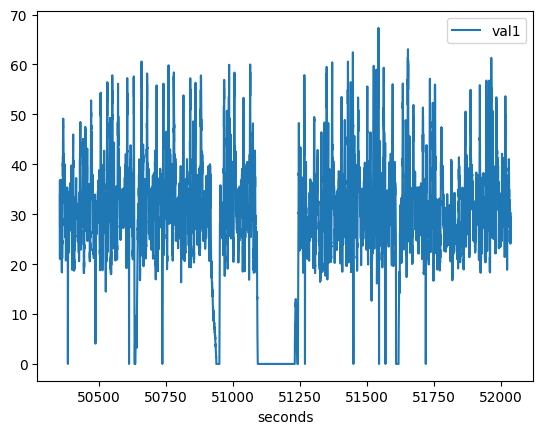

In [27]:
powerInt = integrate.trapezoid(y=(wheel['val1']+wheel['val2'])/2, x=wheel['seconds'])
print(powerInt)
#print(wheel['seconds'].iloc[-1], wheel['seconds'][0])
print('avg:',powerInt/(wheel['seconds'].iloc[-1]-wheel['seconds'][0]))
wheel.plot(x='seconds', y = 'val1')
#print(wheel['val1'].mean())
#print(wheel['val2'].mean())

dfs for current/voltage

In [28]:
current = data[data['combined']=='0x113']
current.reset_index(drop=True, inplace=True)
current.head()
#current.plot(x = 'timestamp', y = 'val')
current.head()
print(len(current))

10297


In [29]:
voltage = data[data['combined']=='0x133']
voltage.reset_index(drop=True, inplace=True)
voltage.head()
#voltage.plot(x = 'timestamp', y = 'val')
voltage.head()
print(len(voltage))

10558


In [30]:
current['val']=[0]*len(current['timestamp'])
voltage['val']=[0]*len(voltage['timestamp'])

C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\4056817518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['val']=[0]*len(current['timestamp'])
C:\Users\dpnim\AppData\Local\Temp\ipykernel_28780\4056817518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voltage['val']=[0]*len(voltage['timestamp'])


In [31]:
#concurrent = []
#for row in range(len(voltage['val'])):
#    if voltage['seconds'][row] in secs:
#        concurrent.append(voltage['seconds'][row])
#print(len(concurrent), concurrent[:20])


Find all times current or voltage was recorded

In [32]:
all = sorted(list({sec for sec in voltage['seconds']}|{sec for sec in current['seconds']}))
print(all, len(all))

[50354.292, 50354.308, 50354.316, 50354.332, 50354.34, 50354.356, 50354.364, 50354.388, 50354.396, 50354.404, 50354.412, 50354.444, 50354.468, 50354.524, 50355.272, 50355.342, 50355.438, 50355.531, 50355.618, 50355.885, 50355.964, 50356.058, 50356.139, 50356.49, 50357.065, 50357.218, 50357.421, 50357.538, 50357.609, 50357.741, 50357.765, 50357.925, 50358.009, 50358.095, 50358.239, 50358.331, 50358.398, 50358.485, 50358.64, 50358.718, 50358.804, 50358.805, 50358.949, 50359.023, 50359.109, 50359.187, 50359.344, 50359.428, 50359.55, 50359.645, 50359.741, 50359.813, 50359.952, 50360.052, 50360.149, 50360.251, 50360.362, 50360.447, 50360.523, 50360.595, 50360.76, 50360.835, 50360.923, 50361.051, 50361.147, 50361.227, 50361.299, 50361.451, 50361.531, 50361.631, 50361.773, 50361.855, 50361.941, 50362.004, 50362.155, 50362.24, 50362.333, 50362.47, 50362.565, 50362.643, 50362.711, 50362.878, 50362.945, 50363.072, 50363.173, 50363.269, 50363.349, 50363.479, 50363.581, 50363.659, 50363.781, 50364

Find values for current/voltage disregarding missing data

In [33]:
currentTimes = [sec for sec in current['seconds']]
currentVals = []
for time in range(len(all)):
    if all[time] in currentTimes:
        currentVals.append(translate(current['bytes'][currentTimes.index(all[time])].split(',')))
    else:
        currentVals.append(None)

currentVals


[23.329429626464844,
 None,
 40.2969856262207,
 40.839454650878906,
 None,
 39.37211990356445,
 0.0,
 0.0,
 1.377161979675293,
 11.820501327514648,
 15.740582466125488,
 15.03071117401123,
 15.03071117401123,
 10.896663665771484,
 13.32824993133545,
 16.56844139099121,
 18.293621063232422,
 22.208789825439453,
 25.437274932861328,
 None,
 37.47338104248047,
 40.14078903198242,
 40.75810623168945,
 None,
 0.0,
 32.36833953857422,
 32.75496292114258,
 32.948280334472656,
 33.10502624511719,
 33.414180755615234,
 33.646114349365234,
 34.572120666503906,
 33.798851013183594,
 31.5950870513916,
 28.89023208618164,
 20.42447853088379,
 10.262596130371094,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.663931846618652,
 9.663931846618652,
 9.663931846618652,
 9.663931846618652,
 23.570669174194336,
 23.703258514404297,
 21.461599349975586,
 14.634961128234863,
 6.745077610015869,
 5.186527729034424,
 3.46803617477417,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 1.904908776283

In [34]:
voltageTimes = [sec for sec in voltage['seconds']]
voltageVals = []
for time in range(len(all)):
    if all[time] in voltageTimes:
        voltageVals.append(translate(voltage['bytes'][voltageTimes.index(all[time])].split(',')))
    else:
        voltageVals.append(None)

voltageVals


[296.1397399902344,
 295.6161193847656,
 295.01190185546875,
 294.8507995605469,
 294.97161865234375,
 294.97161865234375,
 297.67041015625,
 297.8315124511719,
 297.7509765625,
 297.06622314453125,
 296.74395751953125,
 296.70367431640625,
 296.70367431640625,
 296.98565673828125,
 296.86480712890625,
 296.54254150390625,
 296.4620056152344,
 296.0994567871094,
 295.8980712890625,
 295.37445068359375,
 295.09246826171875,
 294.8507995605469,
 294.7702331542969,
 294.7702331542969,
 0.0,
 295.13275146484375,
 295.17303466796875,
 295.05218505859375,
 295.09246826171875,
 295.09246826171875,
 295.05218505859375,
 294.93133544921875,
 295.01190185546875,
 295.13275146484375,
 295.25360107421875,
 295.8175048828125,
 296.54254150390625,
 297.2273254394531,
 297.34814453125,
 297.3078918457031,
 None,
 297.4287109375,
 297.468994140625,
 297.4287109375,
 297.468994140625,
 297.468994140625,
 297.468994140625,
 297.468994140625,
 296.82452392578125,
 296.82452392578125,
 296.82452392578125,

Fill in missing data with linear approximation with two nearest datapoints

In [35]:
for val in range(len(currentVals)):
    if currentVals[val]==None:
        if val == len(currentVals)-1:
            currentVals[val] = (currentVals[val-1]-currentVals[val-2])/(all[val-1]-all[val-2])*(all[val]-all[val-2]) + currentVals[val-2]
        else:
            i = 0
            while currentVals[val+i]==None:
                i+=1
            currentVals[val] = (currentVals[val+i]-currentVals[val-1])/(all[val+i]-all[val-1])*(all[val]-all[val-1]) + currentVals[val-1]

currentVals

[23.329429626464844,
 34.641133624587425,
 40.2969856262207,
 40.839454650878906,
 40.35034306873732,
 39.37211990356445,
 0.0,
 0.0,
 1.377161979675293,
 11.820501327514648,
 15.740582466125488,
 15.03071117401123,
 15.03071117401123,
 10.896663665771484,
 13.32824993133545,
 16.56844139099121,
 18.293621063232422,
 22.208789825439453,
 25.437274932861328,
 34.72525276895177,
 37.47338104248047,
 40.14078903198242,
 40.75810623168945,
 25.308759269344087,
 0.0,
 32.36833953857422,
 32.75496292114258,
 32.948280334472656,
 33.10502624511719,
 33.414180755615234,
 33.646114349365234,
 34.572120666503906,
 33.798851013183594,
 31.5950870513916,
 28.89023208618164,
 20.42447853088379,
 10.262596130371094,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.663931846618652,
 9.663931846618652,
 9.663931846618652,
 9.663931846618652,
 23.570669174194336,
 23.703258514404297,
 21.461599349975586,
 14.634961128234863,
 6.745077610015869,
 5.186527729034424,
 3.46803617477417,

In [36]:
for val in range(len(voltageVals)):
    if voltageVals[val]==None:
        if val == len(voltageVals)-1:
            voltageVals[val] = (voltageVals[val-1]-voltageVals[val-2])/(all[val-1]-all[val-2])*(all[val]-all[val-2]) + voltageVals[val-2]
        else:
            i = 0
            while voltageVals[val+i]==None:
                i+=1
            voltageVals[val] = (voltageVals[val+i]-voltageVals[val-1])/(all[val+i]-all[val-1])*(all[val]-all[val-1]) + voltageVals[val-1]

        

voltageVals

[296.1397399902344,
 295.6161193847656,
 295.01190185546875,
 294.8507995605469,
 294.97161865234375,
 294.97161865234375,
 297.67041015625,
 297.8315124511719,
 297.7509765625,
 297.06622314453125,
 296.74395751953125,
 296.70367431640625,
 296.70367431640625,
 296.98565673828125,
 296.86480712890625,
 296.54254150390625,
 296.4620056152344,
 296.0994567871094,
 295.8980712890625,
 295.37445068359375,
 295.09246826171875,
 294.8507995605469,
 294.7702331542969,
 294.7702331542969,
 0.0,
 295.13275146484375,
 295.17303466796875,
 295.05218505859375,
 295.09246826171875,
 295.09246826171875,
 295.05218505859375,
 294.93133544921875,
 295.01190185546875,
 295.13275146484375,
 295.25360107421875,
 295.8175048828125,
 296.54254150390625,
 297.2273254394531,
 297.34814453125,
 297.3078918457031,
 297.4273222123016,
 297.4287109375,
 297.468994140625,
 297.4287109375,
 297.468994140625,
 297.468994140625,
 297.468994140625,
 297.468994140625,
 296.82452392578125,
 296.82452392578125,
 296.82

combine current/voltage

In [37]:
combined = pd.DataFrame()
combined['time']=all
combined['current']=currentVals
combined['voltage']=voltageVals
combined.head()


,time,current,voltage
0,50354.292,23.329430,296.139740
1,50354.308,34.641134,295.616119
2,50354.316,40.296986,295.011902
3,50354.332,40.839455,294.850800
4,50354.340,40.350343,294.971619


In [38]:
combined['power']=combined['current']*combined['voltage']
combined.head()

,time,current,voltage,power
0,50354.292,23.329430,296.139740,6908.771224
1,50354.308,34.641134,295.616119,10240.477493
2,50354.316,40.296986,295.011902,11888.090369
3,50354.332,40.839455,294.850800,12041.545857
4,50354.340,40.350343,294.971619,11902.206008


integrate power and convert to kwh

In [39]:
from scipy import integrate

powerInt = integrate.trapezoid(y=combined['power'], x=combined['time'])
#print(powerInt)
print(powerInt/1000/3600)

4.630966193256686
